In [16]:
import pandas as pd
import plotly.express as px

In [13]:
In_stock = pd.read_excel('02_01_Sales_Data.xlsx',sheet_name='In-Stock Data')
Geo_Data = pd.read_excel('02_01_Sales_Data.xlsx',sheet_name='Geo Data')
Item_Details = pd.read_excel('02_01_Sales_Data.xlsx',sheet_name='Item Details')
Asrt_Desc = pd.read_excel('02_01_Sales_Data.xlsx',sheet_name='Assortment Details')

In [65]:
In_stock.head()
In_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Item Number ID                 9180 non-null   int64         
 1   Average Inventory On Hand ($)  9180 non-null   float64       
 2   In-Stock %                     9180 non-null   float64       
 3   Sales ($)                      9180 non-null   float64       
 4   Week ID                        9180 non-null   datetime64[ns]
 5   Fiscal Year                    9180 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 430.4+ KB


In [58]:
Geo_Data.head()

,Asrt ID,Variance($),Sales ($),State ID,Store Count,Store Productivity,Weekly Sales ($) Variance to LY
0,12346,-2747.032056,15072.19,AK,5,3014.438000,-0.182258
1,12346,-14177.893049,98068.99,AL,39,2514.589487,-0.144571
2,12346,-10666.634370,50946.96,AR,20,2547.348000,-0.209367
3,12346,-4034.200057,41504.76,AZ,32,1297.023750,-0.097198
4,12346,-24269.440622,196451.64,CA,111,1769.834595,-0.123539


In [60]:
Item_Details.head()

,ID,Category ID,Color,Function
0,308964,12346,Blue,A
1,308965,12346,White,C
2,308966,12346,Red,A
3,308967,12346,Blue,B
4,308968,12346,White,A


In [61]:
Asrt_Desc

,Assortment ID,Assortment Desc,Assortment Group
0,12346,Cell Phones,1
1,16454,Televisions,1
2,18432,Electronics,1
3,18439,Hardware,2


In [14]:
Geo_Data['Asrt ID'].value_counts()

12346    51
18439    51
18432    51
16454    46
Name: Asrt ID, dtype: int64

In [18]:
Geo_Data_merged = Geo_Data.merge(Asrt_Desc,how='left',left_on='Asrt ID',right_on='Assortment ID')
Geo_Data_merged.head()

,Asrt ID,Variance($),Sales ($),State ID,Store Count,Store Productivity,Weekly Sales ($) Variance to LY,Assortment ID,Assortment Desc,Assortment Group
0,12346,-2747.032056,15072.19,AK,5,3014.438000,-0.182258,12346,Cell Phones,1
1,12346,-14177.893049,98068.99,AL,39,2514.589487,-0.144571,12346,Cell Phones,1
2,12346,-10666.634370,50946.96,AR,20,2547.348000,-0.209367,12346,Cell Phones,1
3,12346,-4034.200057,41504.76,AZ,32,1297.023750,-0.097198,12346,Cell Phones,1
4,12346,-24269.440622,196451.64,CA,111,1769.834595,-0.123539,12346,Cell Phones,1


In [56]:
Geo_Data_merged.groupby(['Assortment ID'],as_index=False).sum()
grouped_df

,Asrt ID,Variance($),Sales ($),Store Count,Store Productivity,Weekly Sales ($) Variance to LY,Assortment Group
Assortment ID,,,,,,,
12346,629646,-5.823951e+05,3417613.88,1734,95357.236023,-9.052695,51
16454,756884,-1.573823e+06,3220713.06,1561,90805.573561,-22.771142,46
18432,940032,-6.594205e+05,10476015.93,1734,289382.143436,-4.145003,51
18439,940389,-2.096570e+05,1615791.11,1734,48837.504245,-6.702684,102


### MERGING THE GROUPED DATAFRAME WITH TO JOIN THE DESCRIPTION OF EACH ASSORTMENT ID WITH THE SUM OF SALES

In [53]:
grouped_df_merge = Asrt_Desc.merge(grouped_df,how='left',on = 'Assortment ID')
grouped_df_merge

,Assortment ID,Assortment Desc,Assortment Group_x,Asrt ID,Variance($),Sales ($),Store Count,Store Productivity,Weekly Sales ($) Variance to LY,Assortment Group_y
0,12346,Cell Phones,1,629646,-5.823951e+05,3417613.88,1734,95357.236023,-9.052695,51
1,16454,Televisions,1,756884,-1.573823e+06,3220713.06,1561,90805.573561,-22.771142,46
2,18432,Electronics,1,940032,-6.594205e+05,10476015.93,1734,289382.143436,-4.145003,51
3,18439,Hardware,2,940389,-2.096570e+05,1615791.11,1734,48837.504245,-6.702684,102


### VISUALIZING THE TOTAL SALES FOR EACH CATEGORY OF IETMS SOLD

In [55]:
px.bar(grouped_df_merge, x='Assortment Desc', y = 'Sales ($)')

In [67]:
fig = px.line(In_stock, x = 'Week ID',y='Sales ($)' )
fig.show()

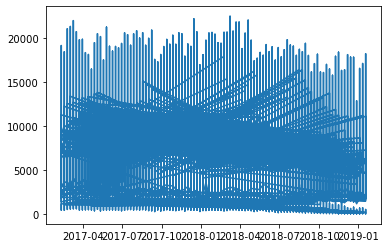

In [70]:
import matplotlib.pyplot as plt
# plt.Line2D(In_stock['Week ID'],In_stock['Sales ($)'])
plt.plot(In_stock['Week ID'],In_stock['Sales ($)'])
plt.show()

In [84]:
pip install python-crontab


  Created wheel for python-crontab: filename=python_crontab-2.5.1-py3-none-any.whl size=25602 sha256=d5d7b5e4c1dfc97bf5718e2d30a1a540acedc8b52c0dbf0278c10c9d7d1fda57
  Stored in directory: c:\users\bright\appdata\local\pip\cache\wheels\cd\5b\e4\6bfb654d6f4233c071d234f9430f7b4df6b26fbead91871811
Successfully built python-crontab


In [92]:
from crontab import CronTab
# from CronTab import crontab
cron = CronTab()
# job = cron.new(command='echo hello_world')
job  = cron.new(command='/C:/Users/Bright/Desktop/sched.py')
job.minute.every(0.25)
# job.
# cron.write()

In [87]:
with CronTab() as cron:
    job = cron.new(command='echo hello_world')
    job.minute.every(1)
print('cron.write() was just executed')

OSError: Please specify user or filename to write.